# Spam Detection Project

CMPE 346 Final Project, Ibrahim Ethem Karalı, 115200058

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from wordcloud import WordCloud
from future.utils import iteritems
from builtins import range

### Read and format the data

In [2]:
# read the data from spam.csv with this encoding to fit
data_frame = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# remove unnecessary columns
data_frame = data_frame.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# change the column names
data_frame.columns = ["label", "message"]

In [3]:
data_frame['b_label'] = data_frame['label'].map({'ham': 0, 'spam': 1})
Y = data_frame['b_label'].values


In [4]:
data_frame_train, data_frame_test, Ytrain, Ytest = train_test_split(data_frame['message'], Y, test_size=0.3)

#### Transform the data

Transform the data with TF-IDF Vectorizer for featuring vectors to use as input to estimator. It also removes the stop words.

In [ ]:
tfidf = TfidfVectorizer(decode_error='ignore')
Xtrain = tfidf.fit_transform(data_frame_train)
Xtest = tfidf.transform(data_frame_test)

In [5]:
def visualize(label):
    words = ''
    for message in data_frame[data_frame['label'] == label]['message']:
        message = message.lower()
        words += message + ' '
    wordcloud = WordCloud(width=800, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


Visualization of the most common words in the spam messages

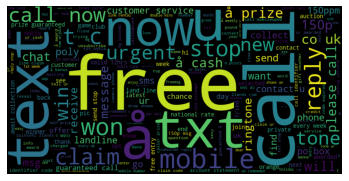

In [6]:
visualize('spam')

Visualization of the most common words in the ham messages

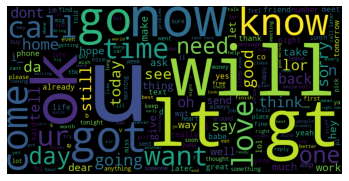

In [7]:
visualize('ham')

A function for reporting the wrong predictions which are spams that are predicted as ham, and hams that are predicted as spams.

In [9]:
def report_wrong_predictions(prediction_label):
    sneaky_spam = data_frame[(data_frame[prediction_label] == 0) & (data_frame['b_label'] == 1)]['message']
    print('Numbers of spams predicted as ham is ', sneaky_spam.count())
    print('\n')
    for msg in sneaky_spam[:3]:
        print(msg)
    not_actually_spam = data_frame[(data_frame[prediction_label] == 1) & (data_frame['b_label'] == 0)]['message']
    print('\n')
    print('Numbers of ham messages predicted as spam is ', not_actually_spam.count())
    
    for msg in not_actually_spam[:3]:
        print(msg)
    print('\n')

### Multinominal Naive Bayes algorithm

In [10]:
NB_model = MultinomialNB()
NB_model.fit(Xtrain, Ytrain)
print('Naive Bayes Score: \n')
print("train score:", NB_model.score(Xtrain, Ytrain))
print("test score:", NB_model.score(Xtest, Ytest))

Naive Bayes Score: 

train score: 0.97
test score: 0.9527511961722488


In [11]:
X = tfidf.transform(data_frame['message'])
data_frame['prediction_NB'] = NB_model.predict(X)
report_wrong_predictions('prediction_NB')

Numbers of spams predicted as ham is  196


FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL
Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged


Numbers of ham messages predicted as spam is  0




### AdaBoostClassifier algorithm

In [12]:
ABC_Model = AdaBoostClassifier()
ABC_Model.fit(Xtrain, Ytrain)
print('AdaBoostClassifier Score: \n')
print('train score:', ABC_Model.score(Xtrain,Ytrain))
print('test score:', ABC_Model.score(Xtest, Ytest))

AdaBoostClassifier Score: 

train score: 0.9843589743589743
test score: 0.9688995215311005


In [13]:
data_frame['prediction_ABC'] = ABC_Model.predict(X)
report_wrong_predictions('prediction_ABC')

Numbers of spams predicted as ham is  84


FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"


Numbers of ham messages predicted as spam is  29
Yes:)from last week itself i'm taking live call.
1.20 that call cost. Which i guess isnt bad. Miss ya, need ya, want ya, love ya
I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones




### Multi-Layer Perception algorithm

In [14]:
mlp_classifier_model = MLPClassifier()
mlp_classifier_model.fit(Xtrain, Ytrain)
print('MLP Classifier Score: \n')
print('train score:', mlp_classifier_model.score(Xtrain,Ytrain))
print('test score:', mlp_classifier_model.score(Xtest, Ytest))

MLP Classifier Score: 

train score: 1.0
test score: 0.9880382775119617


In [15]:
data_frame['prediction_MLP'] = mlp_classifier_model.predict(X)
report_wrong_predictions('prediction_MLP')

Numbers of spams predicted as ham is  19


FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES
22 days to kick off! For Euro2004 U will be kept up to date with the latest news and results daily. To be removed send GET TXT STOP to 83222


Numbers of ham messages predicted as spam is  1
26th OF JULY


